In [1]:
using ITensors
using Plots
using LaTeXStrings

In [2]:
# Create the spin-one sites
N = 200
sites = siteinds("S=1",N)

# Define the Heisenberg Hamiltonian operator
os = OpSum()
for j=1:N-1
    os += "Sz",j,"Sz",j+1
    os += 0.5,"S+",j,"S-",j+1
    os += 0.5,"S-",j,"S+",j+1
    os -= "Sz",j 
end
H = MPO(os,sites)
nothing

In [3]:
# Create a random matrix product state in order to start the algorithm
psi0 = randomMPS(sites)

# Define some parameters to control the sweeping
maxdim = 200
cutoff = 1E-10

# DMRG algorithm
de, energy0, E, steps, step = 1, 0, zeros(0), zeros(0), 0

while de > 5e-3  # convergence criteria
    step += 1
    append!( steps, step)
    energy, psi = dmrg(H,psi0; nsweeps=1, maxdim, cutoff)
    psi0 = psi
    de = abs(energy - energy0)
    energy0 = energy
    println("Step\t$step\t->\tEnergy difference\t=\t$de")
    append!( E, energy )
end

After sweep 1 energy=-284.1355521201376  maxlinkdim=9 maxerr=4.97E-16 time=17.209
Step	1	->	Energy difference	=	284.1355521201376
After sweep 1 energy=-289.04933260431284  maxlinkdim=63 maxerr=1.00E-10 time=1.788
Step	2	->	Energy difference	=	4.91378048417522
After sweep 1 energy=-289.4097162803116  maxlinkdim=77 maxerr=1.00E-10 time=5.071
Step	3	->	Energy difference	=	0.36038367599877574
After sweep 1 energy=-289.5665979284921  maxlinkdim=107 maxerr=9.99E-11 time=5.416
Step	4	->	Energy difference	=	0.15688164818050154
After sweep 1 energy=-289.68262054848344  maxlinkdim=110 maxerr=9.99E-11 time=5.601
Step	5	->	Energy difference	=	0.11602261999132679
After sweep 1 energy=-289.78984173913216  maxlinkdim=132 maxerr=1.00E-10 time=7.384
Step	6	->	Energy difference	=	0.10722119064871549
After sweep 1 energy=-289.84477825442383  maxlinkdim=137 maxerr=9.99E-11 time=10.515
Step	7	->	Energy difference	=	0.054936515291672094
After sweep 1 energy=-289.8792890721016  maxlinkdim=167 maxerr=1.00E-10

In [4]:
# Plot the resulting energy after each sweep
plot(steps, E,
    tickfontsize=40,
    legendfontsize=40,
    labelfontsize=40,
    linewidth=5,
    lc=:red
    )

plot!(steps, E,
    seriestype=:scatter,
    mc=:blue,
    ms=20, ma=5
    )

hline!([last(E)], linestyle=:dash, linewidth=3, lc=:black)

plot!(size=(3000,1500), legend=false, margin=20Plots.mm)
xlabel!("Number of sweeps")
ylabel!("Ground State Energy [eV]")
savefig("ground_state_energy.png")

"/home/lucacintu/Scrivania/Strutture-Dati-e-Algoritmi/ground_state/ground_state_energy.png"

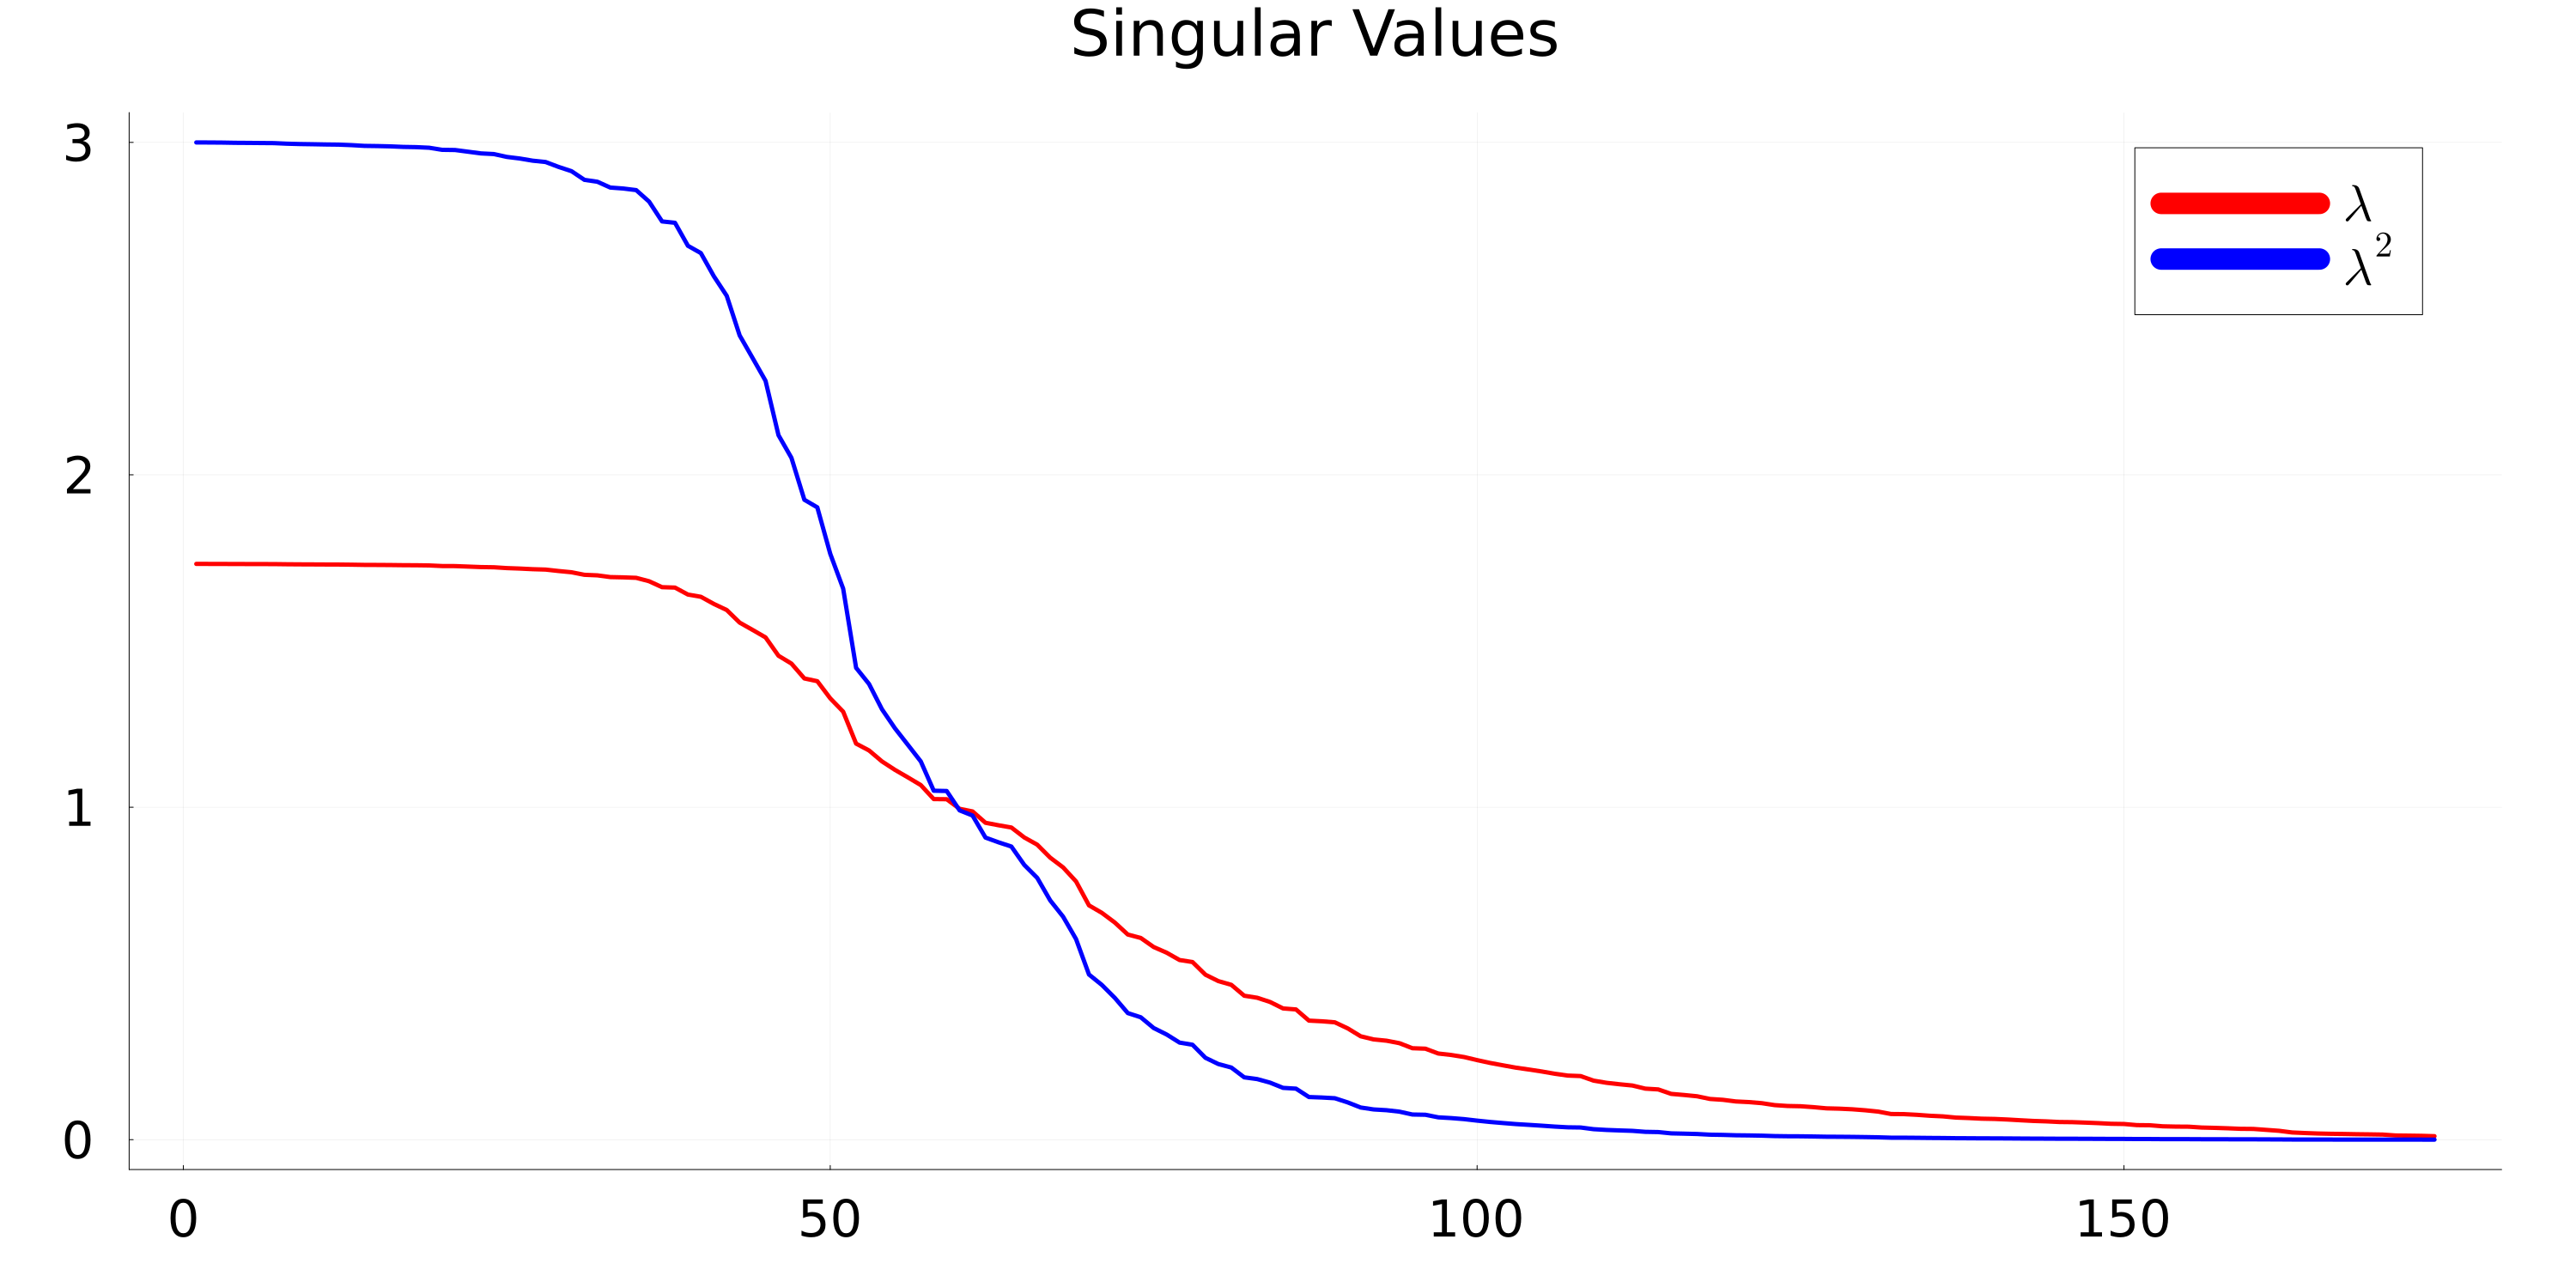

In [5]:
i, j, k = inds(psi0[150])
U,S,V = svd(psi0[150], j)

lambda = zeros(0)
for s in S
    if s != 0
        append!( lambda, s )
    end
end

plot(lambda,
    label=L"$\lambda$",
    tickfontsize=40,
    legendfontsize=40,
    labelfontsize=40,
    linewidth=5,
    lc=:red)

plot!(lambda.^2,
    label=L"$\lambda^2$",
    linewidth=5,
    lc=:blue)

plot!(size=(3000,1500), margin=20Plots.mm)
title!("Singular Values", titlefontsize=50)